In [236]:
import numpy as np 
import pandas as pd 

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from tqdm import tqdm

import matplotlib.pyplot as plt 
import seaborn as sns

In [323]:
def R2(y, y_pred):
    return 1 - (y - y_pred).var() / y.var()

def mse_err(y, y_pred):
    return (sum((y - y_pred)**2)) / len(y)

def calc_std_feat(x):
    res = (x - x.mean(axis=0)) / x.std(axis=0)
    return res

In [324]:
train_file = 'mlearning/students_reg_train.csv'
df = pd.read_csv(train_file)

In [325]:
dft = pd.read_csv(test_file)
dft = dft.set_index('Id')

## Разведывательный анализ

In [326]:
df.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,86.0
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0


In [327]:
df = df.set_index('Id')

In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10000 non-null  float64
 1   years_of_experience  10000 non-null  float64
 2   lesson_price         10000 non-null  float64
 3   qualification        10000 non-null  float64
 4   physics              10000 non-null  float64
 5   chemistry            10000 non-null  float64
 6   biology              10000 non-null  float64
 7   english              10000 non-null  float64
 8   geography            10000 non-null  float64
 9   history              10000 non-null  float64
 10  mean_exam_points     10000 non-null  float64
dtypes: float64(11)
memory usage: 937.5 KB


In [329]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,10000.0,45.8780,8.043929,23.0,40.0,46.0,51.0,68.0
years_of_experience,10000.0,1.9868,1.772213,0.0,0.0,2.0,3.0,10.0
lesson_price,10000.0,1699.1050,524.886654,200.0,1300.0,1500.0,2150.0,3950.0
qualification,10000.0,1.7195,0.792264,1.0,1.0,2.0,2.0,4.0
physics,10000.0,0.3750,0.484147,0.0,0.0,0.0,1.0,1.0
chemistry,10000.0,0.1329,0.339484,0.0,0.0,0.0,0.0,1.0
biology,10000.0,0.1096,0.312406,0.0,0.0,0.0,0.0,1.0
english,10000.0,0.0537,0.225436,0.0,0.0,0.0,0.0,1.0
geography,10000.0,0.0321,0.176274,0.0,0.0,0.0,0.0,1.0
history,10000.0,0.0194,0.137933,0.0,0.0,0.0,0.0,1.0


In [330]:
df['age'].unique()

array([40., 48., 39., 46., 43., 33., 53., 60., 49., 34., 50., 42., 45.,
       54., 57., 52., 58., 55., 44., 35., 41., 47., 51., 56., 63., 31.,
       38., 65., 66., 36., 64., 62., 68., 32., 30., 37., 23., 29., 59.,
       24., 61., 28., 27., 26., 67., 25.])

In [331]:
df['qualification'].value_counts()

1.0    4884
2.0    3087
3.0    1979
4.0      50
Name: qualification, dtype: int64

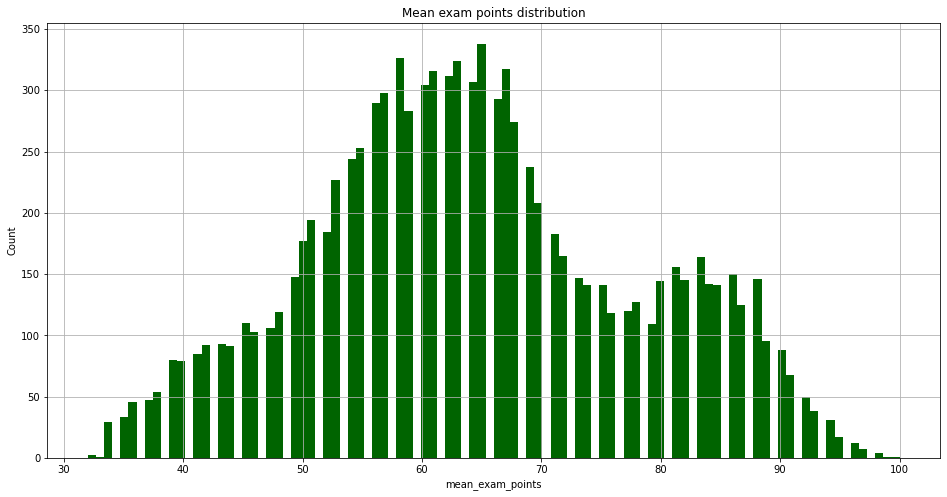

In [332]:
plt.figure(figsize = (16, 8))

df['mean_exam_points'].hist(bins=100, color='darkgreen')

plt.title('Mean exam points distribution')
plt.ylabel('Count')
plt.xlabel('mean_exam_points')
plt.show()

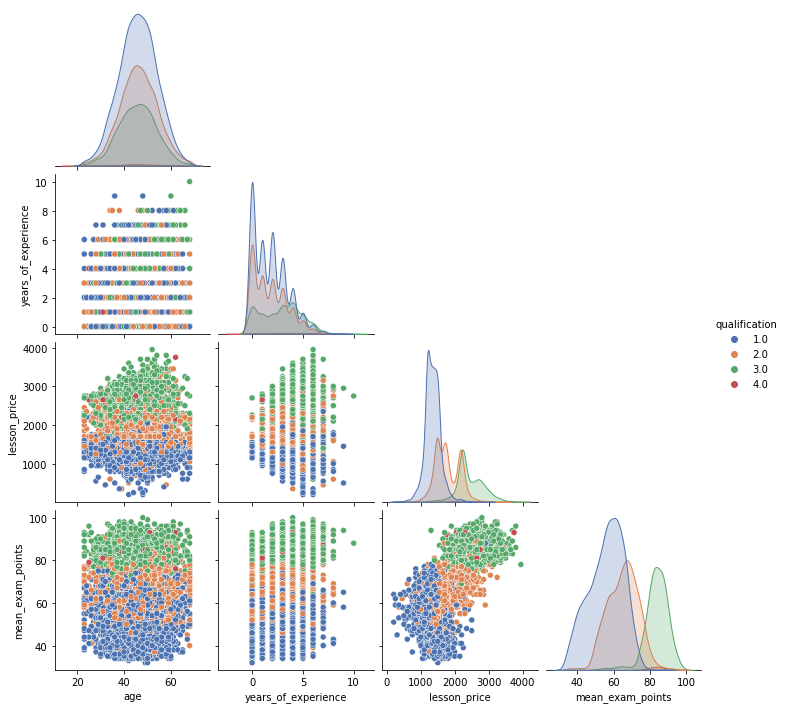

In [333]:
sns.pairplot(df[['age', 'years_of_experience', 'lesson_price', 'mean_exam_points', 'qualification']],
             corner=True, hue = 'qualification', palette ='deep')

## Категориальные и нумерические признаки

In [334]:
df.columns

Index(['age', 'years_of_experience', 'lesson_price', 'qualification',
       'physics', 'chemistry', 'biology', 'english', 'geography', 'history',
       'mean_exam_points'],
      dtype='object')

In [335]:
numeric_feats = ['age', 'years_of_experience', 'lesson_price']

boolean_feats = ['physics', 'chemistry','biology', 'english','geography',
                     'history']

__qualification - категориальный признак__

In [336]:
df['qualification'] = df['qualification'].astype(str)
df[boolean_feats] = df[boolean_feats].astype(int)
df_new = pd.get_dummies(df)

In [337]:
df_new.columns

Index(['age', 'years_of_experience', 'lesson_price', 'physics', 'chemistry',
       'biology', 'english', 'geography', 'history', 'mean_exam_points',
       'qualification_1.0', 'qualification_2.0', 'qualification_3.0',
       'qualification_4.0'],
      dtype='object')

In [338]:
feats = ['age', 'years_of_experience', 'lesson_price', 'physics', 'chemistry',
       'biology', 'english', 'geography', 'history',
       'qualification_1.0', 'qualification_2.0', 'qualification_3.0',
       'qualification_4.0']

## Масштабирование признаков

In [339]:
X = df_new[feats]
y = df_new['mean_exam_points']

In [340]:
X_scaled = calc_std_feat(X)
X_scaled.head()

,age,years_of_experience,lesson_price,physics,chemistry,biology,english,geography,history,qualification_1.0,qualification_2.0,qualification_3.0,qualification_4.0
Id,,,,,,,,,,,,,
0,-0.730737,-1.121084,-0.569847,1.290930,-0.391477,-0.350825,-0.238205,5.490868,-0.140648,1.023424,-0.668211,-0.496692,-0.070885
1,0.263801,1.135981,2.192654,1.290930,-0.391477,-0.350825,-0.238205,-0.182102,-0.140648,-0.977014,-0.668211,2.013120,-0.070885
2,-0.855055,-1.121084,-0.950881,-0.774558,-0.391477,-0.350825,-0.238205,-0.182102,-0.140648,1.023424,-0.668211,-0.496692,-0.070885
3,0.015167,1.700247,-0.569847,-0.774558,-0.391477,-0.350825,-0.238205,-0.182102,-0.140648,1.023424,-0.668211,-0.496692,-0.070885
4,-0.357785,-0.556818,-0.379330,-0.774558,-0.391477,-0.350825,-0.238205,-0.182102,-0.140648,1.023424,-0.668211,-0.496692,-0.070885


## Тренировочная и валидационная выборки

In [341]:
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.25, shuffle=True, random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((7500, 13), (2500, 13), (7500,), (2500,))

## Линейная модель

In [342]:
X_train_linear, X_valid_linear = X_train.copy(), X_valid.copy()
X_train_linear['ones']= 1
X_valid_linear['ones']= 1

Проверка матрицы на вырожденность

In [343]:
XTX = X_train_linear.T.dot(X_train_linear)
np.linalg.det(XTX)

-2.0943213733292422e+39

Определитель не равен нулю. Значит найдем веса матричным способом.

In [344]:
XTX_inv = np.linalg.inv(XTX)
weights = XTX_inv.dot(X_train_linear.T).dot(y_train)
y_pred = X_valid_linear.dot(weights)

In [345]:
y_pred = X_valid_linear.dot(weights)

In [346]:
R2(y_valid, y_pred)

0.6566238922040009

## Градиентный бустинг

In [347]:
def gb_predict(X, trees_list, coef_list, eta):
    X = np.array(X)
    return np.array([sum([eta * coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

def mse_err(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

def bias(y, z):
    return (y - z)

In [348]:
def gb_fit(n_trees,
           max_depth,
           max_features,
           min_samples_leaf,
           X_train, X_test,
           y_train, y_test,
           coef, eta):
    
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    
    coefs = [coef] * n_trees
    
  # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in tqdm(range(n_trees)):
        tree = DecisionTreeRegressor(max_depth=max_depth,
                                     max_features = max_features,
                                     min_samples_leaf = min_samples_leaf,
                                     random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mse_err(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mse_err(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mse_err(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mse_err(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors, coefs
        

## Кастомизация дерева

In [367]:
params_grid = {
    'max_features': [3, 5, 9, 10, 11, X_train.shape[1]],
    'min_samples_leaf': [2, 5, 10, 30, 50, 60]
}
err_history_params = []

for max_features in params_grid['max_features']:
    err_by_max_depth = []
    
    for min_samples_leaf in params_grid['min_samples_leaf']:
        trees, train_errors, test_errors, coefs = gb_fit(n_trees=4,
                                                         max_depth=50,
                                                         max_features = max_features,
                                                         min_samples_leaf = min_samples_leaf,
                                                         X_train=X_train,
                                                         X_test=X_valid,
                                                         y_train=y_train,
                                                         y_test=y_valid, 
                                                         coef=1,
                                                         eta=1)
        err_by_max_depth.append(np.min(test_errors))
    err_history_params.append(err_by_max_depth)

100%|██████████| 4/4 [00:03<00:00,  1.21it/s]


Text(0.5, 1.0, 'Test errors')

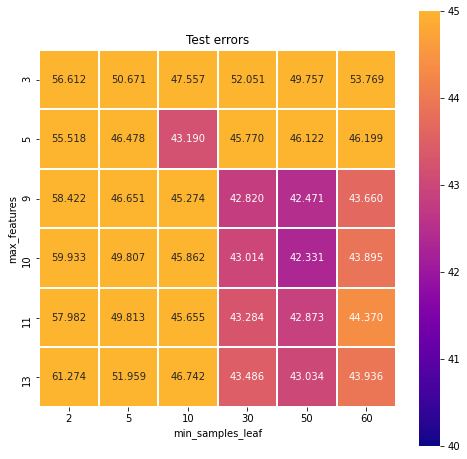

In [368]:
result = pd.DataFrame(
    err_history_params,
    index=params_grid['max_features'],
    columns=params_grid['min_samples_leaf'])

fig, axes = plt.subplots(1,1,figsize=(8,8))
sns.heatmap(result,
            cmap='plasma',
            annot=True,
            fmt='.3f',
            linewidths=1,
            square=True,
            vmin=40,
            vmax=45,
            center= 43,
            ax=axes)

axes.set_xlabel('min_samples_leaf')
axes.set_ylabel('max_features')
axes.set_title('Test errors')

In [369]:
params_grid = {
    'max_depth': [5, 10, 40, 50, 70],
    'n_trees': [2, 4, 5, 10, 15]
}
err_history_params = []

for max_depth in params_grid['max_depth']:
    err_by_max_depth = []
    
    for n_trees in params_grid['n_trees']:
        trees, train_errors, test_errors, coefs = gb_fit(n_trees=n_trees,
                                                         max_depth=max_depth,
                                                         max_features = 10,
                                                         min_samples_leaf = 40,
                                                         X_train=X_train,
                                                         X_test=X_valid,
                                                         y_train=y_train,
                                                         y_test=y_valid, 
                                                         coef=1,
                                                         eta=1)
        err_by_max_depth.append(np.min(test_errors))
    err_history_params.append(err_by_max_depth)
    

100%|██████████| 15/15 [00:56<00:00,  3.75s/it]


Text(0.5, 1.0, 'Test errors')

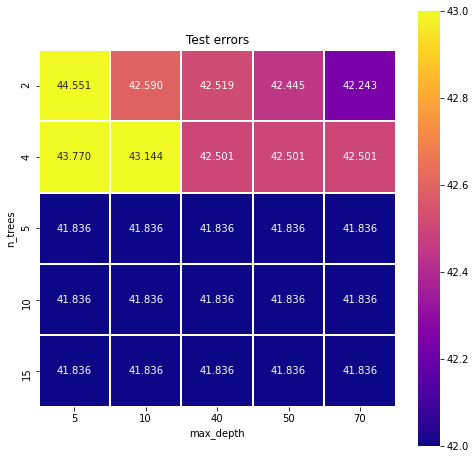

In [370]:
result = pd.DataFrame(
    err_history_params,
    index=params_grid['n_trees'],
    columns=params_grid['max_depth'])

fig, axes = plt.subplots(1,1,figsize=(8,8))
sns.heatmap(result,
            cmap='plasma',
            annot=True,
            fmt='.3f',
            linewidths=1,
            square=True,
            vmin=42,
            vmax=43,
            center= 42.5,
            ax=axes)

axes.set_xlabel('max_depth')
axes.set_ylabel('n_trees')
axes.set_title('Test errors')

## Вариант 1

In [378]:
trees, train_errors, test_errors, coefs = gb_fit(n_trees=4, 
                                                 max_depth=5,
                                                 max_features = 10,
                                                 min_samples_leaf = 20,
                                                  X_train=X_train,
                                                  X_test=X_valid,
                                                  y_train=y_train,
                                                  y_test=y_valid, 
                                                  coef=1,
                                                  eta=1)

100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


In [379]:
y_pred_train = gb_predict(X_train,trees,coefs,eta=1)
y_pred_valid = gb_predict(X_valid,trees,coefs,eta=1)

print(f'R2 на трейне: {R2(y_train, y_pred_train)}')
print(f'R2 на валиде: {R2(y_valid, y_pred_valid)}')

R2 на трейне: 0.7799498642361824
R2 на валиде: 0.7659578987372444


## Предсказание на тесте

In [397]:
test_file = 'mlearning/students_reg_test.csv'
dft = pd.read_csv(test_file)
dft = dft.set_index('Id')
dft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 10000 to 19999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10000 non-null  float64
 1   years_of_experience  10000 non-null  float64
 2   lesson_price         10000 non-null  float64
 3   qualification        10000 non-null  float64
 4   physics              10000 non-null  float64
 5   chemistry            10000 non-null  float64
 6   biology              10000 non-null  float64
 7   english              10000 non-null  float64
 8   geography            10000 non-null  float64
 9   history              10000 non-null  float64
dtypes: float64(10)
memory usage: 859.4 KB


In [398]:
dft['qualification'] = dft['qualification'].astype(str)
dft[boolean_feats] = dft[boolean_feats].astype(int)
dft_new = pd.get_dummies(dft)

In [399]:
X_test = calc_std_feat(dft_new)
X_test.head()

,age,years_of_experience,lesson_price,physics,chemistry,biology,english,geography,history,qualification_1.0,qualification_2.0,qualification_3.0,qualification_4.0
Id,,,,,,,,,,,,,
10000,0.003419,0.571977,-1.234296,-0.785004,2.663917,-0.369431,-0.243549,-0.180041,-0.136905,1.004560,-0.654309,-0.496692,-0.067976
10001,-0.373642,0.571977,0.291657,-0.785004,-0.375349,-0.369431,-0.243549,-0.180041,-0.136905,-0.995361,1.528177,-0.496692,-0.067976
10002,0.757540,-0.549547,-0.280575,1.273752,-0.375349,-0.369431,-0.243549,-0.180041,-0.136905,1.004560,-0.654309,-0.496692,-0.067976
10003,1.385974,2.254262,2.294470,1.273752,-0.375349,2.706596,-0.243549,-0.180041,-0.136905,-0.995361,-0.654309,2.013120,-0.067976
10004,-0.247955,1.132739,2.771331,1.273752,-0.375349,-0.369431,-0.243549,-0.180041,-0.136905,-0.995361,-0.654309,2.013120,-0.067976


In [400]:
y_pred_test = gb_predict(X_test,trees,coefs,eta=1)

In [402]:
len(y_pred_test)

10000